<a href="https://colab.research.google.com/github/niksisons/ml/blob/main/6.%20%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%D1%81%20%D1%8D%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8%20%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%D0%BC%D0%B8.%20%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D0%BF%D0%BE%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F%20%D0%B8%20%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%20%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80%D1%8B/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%966_%D0%A4%D0%BE%D1%80%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%8D%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №6. Формирование электронных таблиц. Многопоточная и многопроцессорная оптимизация. Работа с генераторами

# Теоретическая часть

## 1. Генераторы в Python

**Генератор данных** - это специальный вид функции в Python, который позволяет создавать последовательность значений по мере необходимости. Вместо того чтобы сразу генерировать и хранить все значения, генератор создает их по одному по требованию.


1. **Создание генератора:**
    - Генератор создается с использованием ключевого слова `yield` внутри функции.
    - Вместо `return`, генератор использует `yield` для возврата значения и приостановки выполнения функции.
    - Пример:
        ```python
        def my_generator():
            yield 1
            yield 2
            yield 3

        gen = my_generator()
        ```

2. **Ленивая загрузка:**
    - Генераторы работают с ленивой загрузкой (lazy evaluation).
    - Они не создают все значения сразу, а только по мере запроса.
    - Это полезно для обработки больших объемов данных, когда нельзя или не нужно хранить все значения в памяти.

3. **Итерация по генератору:**
    - Генераторы можно использовать в циклах `for`.
    - Каждый вызов `yield` возвращает следующее значение из генератора.
    - Пример:
        ```python
        for value in gen:
            print(value)
        ```

4. **Состояние генератора:**
    - Генераторы сохраняют свое состояние между вызовами.
    - После каждого `yield` выполнение функции приостанавливается, а состояние сохраняется.
    - При следующем вызове генератор продолжает выполнение с того места, где остановился.

5. **Применение генераторов:**
    - Генераторы полезны для обработки больших файлов, потоковых данных, бесконечных последовательностей и других сценариев, где требуется эффективная загрузка данных.

### 1.1. **Функция `next()`**

1. **Функция `next()`**:
    - `next()` - это встроенная функция Python, которая используется для получения следующего значения из итератора (включая генераторы).
    - Когда вызывается `next()`, итератор продвигается к следующему элементу и возвращает его.
    - Если больше элементов нет, вызывается исключение `StopIteration`.

2. **Использование в генераторах**:
    - В примерах, которые я предоставил ранее, мы использовали `next()` для получения следующей порции данных из генератора.
    - В генераторах `next()` используется для получения следующего значения, которое было создано с помощью `yield`.
    - Пример:
        ```python
        def my_generator():
            yield 1
            yield 2
            yield 3

        gen = my_generator()

        print(next(gen))  # Выведет 1
        print(next(gen))  # Выведет 2
        print(next(gen))  # Выведет 3
        ```

3. **Обработка исключения `StopIteration`**:
    - Если больше элементов нет, вызывается исключение `StopIteration`.
    - Поэтому важно использовать `next()` внутри блока `try`/`except` для обработки этого исключения.

В общем, `next()` -  позволяет нам получать значения по мере необходимости, что особенно полезно при обработке больших объемов данных.

### 1.2. Примеры генераторов:



1. **Генератор случайных чисел:**
    - Этот генератор возвращает случайные числа в заданном диапазоне.

In [ ]:
import random

def random_numbers(n, min_val, max_val):
    for _ in range(n):
        yield random.randint(min_val, max_val)

In [ ]:
# Пример использования

gen = random_numbers(5, 1, 10)

for num in gen:
    print(num)

6
8
4
4
3


In [ ]:
gen = random_numbers(5, 1, 10)

In [ ]:
next(gen)

9

2. **Генератор бесконечной последовательности чисел:**
    - Этот формирует создает бесконечную последовательность чисел, начиная с заданного значения.


In [ ]:
def infinite_sequence(start=0):
    while True:
        yield start
        start += 1

In [ ]:
# Пример использования
numbers = infinite_sequence(10)
for _ in range(5):
    print(next(numbers))

10
11
12
13
14


In [ ]:
next(numbers)

18


3. **Генератор факториалов:**
    - Этот генератор создает последовательность факториалов чисел.


In [ ]:
def factorial():
    result = 1
    n = 1
    while True:
        yield result
        n += 1
        result *= n

In [ ]:
# Пример использования
fact_gen = factorial()
for _ in range(6):
    print(next(fact_gen))

1
2
6
24
120
720


4. **Генератор строк из файла:**
    - Этот генератор читает строки из текстового файла по одной.


In [ ]:
def generate_text_file(file_path="my_text_file.txt", num_lines=15):
    with open(file_path, 'w') as file:
        for i in range(1, num_lines + 1):
            file.write(f"This is line {i}\n")
generate_text_file()

def read_lines(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            yield line.strip()

In [ ]:
# Пример использования
file_path = "my_text_file.txt"

gen = read_lines(file_path)

for line in gen:
    print(line)

This is line 1
This is line 2
This is line 3
This is line 4
This is line 5
This is line 6
This is line 7
This is line 8
This is line 9
This is line 10
This is line 11
This is line 12
This is line 13
This is line 14
This is line 15


In [ ]:
gen = read_lines(file_path)

In [ ]:
next(gen)

'This is line 1'

## 2. Оптимизация вычислений

Оптимизация программного обеспечения является важной частью разработки программного обеспечения. Она включает в себя ряд техник и подходов, направленных на улучшение производительности и эффективности программы. Одним из способов достижения этого является использование параллелизма, который может быть реализован с помощью процессов или потоков.


- **Процесс** - это программа, которая выполняется на вашем компьютере. Каждый процесс имеет свое собственное виртуальное пространство памяти и работает независимо от других процессов. Процессы могут взаимодействовать друг с другом через системные вызовы.

- **Поток**, с другой стороны, является частью процесса. Потоки в одном процессе могут делиться некоторыми ресурсами, такими как память, что делает их более легкими и быстрее в создании и переключении, чем процессы. Потоки в одном процессе могут работать параллельно, что позволяет более эффективно использовать многоядерные процессоры.



Можно сказать, что процесс - это как программа, выполняющаяся на вашем компьютере, а поток - это задача, которую выполняет этот процесс. Если у вас есть несколько потоков в одном процессе, они могут выполнять задачи параллельно.

В зависимости от конкретных требований и ограничений вашего приложения, вы можете выбрать использовать либо процессы, либо потоки для оптимизации вашей программы. Оба подхода имеют свои преимущества и недостатки, и выбор между ними будет зависеть от специфики вашей задачи.

### 2.1. Модули для управления процессами и потоками в Python

- **Multiprocessing** в Python - это модуль, который позволяет создавать процессы, используя API. Он обеспечивает как локальную, так и удаленную параллельность, эффективно обходя глобальную блокировку интерпретатора за счет использования подпроцессов вместо потоков. Это позволяет полностью использовать несколько ядер (процессоров) на данной машине. Он работает как на POSIX, так и на Windows.

- **ThreadPoolExecutor** в Python - это класс, который предоставляет возможность создания и использования пула потоков для эффективного выполнения задач параллельно. Этот класс является частью стандартной библиотеки Python и предлагает легко используемые пулы рабочих потоков посредством современного шаблона исполнителя. Он идеален для выполнения циклов задач ввода-вывода параллельно и для выдачи задач асинхронно.

> В обоих случаях, `multiprocessing` и `ThreadPoolExecutor` предоставляют удобные и эффективные способы для параллельного выполнения задач в Python. Они оба являются мощными инструментами, которые могут значительно улучшить производительность и эффективность ваших программ на Python. Однако выбор между ними зависит от конкретных требований и ограничений вашего приложения. В некоторых случаях может быть предпочтительнее использовать `multiprocessing`, в то время как в других случаях лучше использовать `ThreadPoolExecutor`.

#### *Таблица №1. Сравнительная таблица Multiprocessing и ThreadPoolExecutor*

| Критерий | Multiprocessing | ThreadPoolExecutor |
|---|---|---|
| **Тип** | **Процессы** | **Потоки** |
| **Совместное использование данных** | **Сериализация** | **Объекты Python** |
| **Скорость** | **Высокая** | **Средняя** |
| **Сложность** | **Высокая** | **Низкая** |
| **Ошибки** | **Ошибки сериализации** | **Ограничения потоков** |
| **Подходит для** | **Задачи, требующие много ресурсов** | **Задачи, не требующие много ресурсов** |


**Рекомендации:**

* **Используйте** Multiprocessing для задач, которые **можно** разделить на **независимые** части и **требуют** много ресурсов.
* **Используйте** ThreadPoolExecutor для задач, которые **не** требуют большого количества ресурсов и **не могут** быть разделены на независимые части.


### 2.2. Сериализация

**Сериализация** - это процесс преобразования объекта Python в байтовый поток, который можно сохранить или передать по сети. Это может быть полезно для сохранения данных, обмена данными между программами или для удаленного выполнения кода.

**Пример:**

```python
import pickle

a = [1, 2, 3]

with open("data.pkl", "wb") as f:
    pickle.dump(a, f)

with open("data.pkl", "rb") as f:
    b = pickle.load(f)

print(a == b)  # True
```

В этом примере мы сериализовали список `a` в файл `data.pkl`. Затем мы десериализовали файл обратно в переменную `b`.

#### Объекты Python

**Объекты Python** - это сущности, которые имеют состояние и поведение. Они могут быть созданы из классов или с помощью встроенных функций Python.

**Пример:**

```python
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

p = Person("John Doe", 30)

print(p.name)  # John Doe
print(p.age)  # 30
```

В этом примере мы создали класс `Person` и затем создали объект `p` этого класса.

#### Сериализация и объекты Python

* **Сериализация** может быть использована для совместного использования данных между процессами или машинами.
* **Объекты Python** могут быть сериализованы для сохранения их состояния или для передачи их по сети.



### 2.3. **Простыми словами:**

##### **2.3.1. Процессы и потоки:**



- **Процесс:**
  - Представьте себе **пекарню**. Пекарня – это **процесс**, в котором происходит выпечка хлеба. В пекарне есть разные **инструменты** (миксеры, печи) и **ингредиенты** (мука, вода), которые используются для создания **продукта** (хлеба).

- **Поток:**
  - Теперь представьте, что **пекари** – это **потоки** в пекарне. Каждый пекарь выполняет **часть** работы (замешивает тесто, ставит хлеб в печь), но все они **вместе**

**В чем разница?**
* **Процесс** – это **самостоятельная** программа, которая работает в **своей** памяти.
* **Поток** – это **часть** процесса, которая выполняется **одновременно** с другими потоками.




##### **2.3.2. Многопроцессорность и пул потоков:**

1. **Multiprocessing (Многопроцессорность)**:
    - Представьте, что у вас есть несколько "рабочих", каждый из которых выполняет свою задачу.
    - В многопроцессорном подходе каждый рабочий (процесс) работает в отдельном ядре (процессоре).
    - Это позволяет выполнять несколько задач одновременно, так как каждый процесс имеет свои собственные ресурсы (память, вычислительную мощность).
    - Пример: Если у вас есть 4 ядра на компьютере, вы можете запустить 4 процесса параллельно для ускорения вычислений.

2. **ThreadPoolExecutor (Пул потоков)**:
    - Представьте, что у вас есть команда рабочих, работающих в одной комнате.
    - В пуле потоков все рабочие (потоки) используют общие ресурсы (память, вычислительную мощность).
    - Они могут выполнять разные задачи, но в одном и том же ядре (процессоре).
    - Это позволяет эффективно использовать доступные ресурсы, но потоки работают последовательно (не одновременно).
    - Пример: Если у вас есть 4 ядра, но много задач, пул потоков поможет распределить работу между потоками.



>**Вывод**: Многопроцессорность позволяет выполнять задачи одновременно, но требует больше ресурсов. Пул потоков более эффективен в использовании ресурсов, но работает последовательно. Выбор зависит от конкретной задачи и доступных ресурсов.

### 2.4. Примеры

### 2.4.1. Пример №1

Ниже приведен пример кода на Python, который демонстрирует использование модулей `multiprocessing` и `ThreadPoolExecutor` для параллельного выполнения задачи. Задача, которую выполняет этот код, - это возведение в квадрат каждого числа в диапазоне от 0 до 100000:

1. В начале кода определяется функция `task`, которая принимает число и возвращает его квадрат. Затем определяется функция `measure_time`, которая измеряет время выполнения функции.

2. В основной части кода сначала выполняется последовательное выполнение задачи с использованием функции `map`. Затем та же задача выполняется параллельно с использованием модуля `multiprocessing`. Наконец, задача выполняется с использованием `ThreadPoolExecutor`.

3. Время выполнения каждого из этих подходов замеряется и выводится на экран. Это позволяет сравнить производительность каждого подхода.

In [ ]:
import multiprocessing
import time
import math
from concurrent.futures.thread import ThreadPoolExecutor


# def task(x):
#     return x ** 2

# def task(x):
#     with open("data.txt", "w+") as f:
#         data = f.read()
#     result = x ** 2 + len(data)
#     return result

def task(x):
    if x % 11 == 0:
        time.sleep(0.0001)  # Имитация более длительной задачи
    return x ** 2


def measure_time(func, args):
    start = time.time()
    result = func(*args)
    end = time.time()
    return end - start

num_processes = multiprocessing.cpu_count()

if __name__ == '__main__':
    # Sequential execution (no multiprocessing or ThreadPoolExecutor)
    sequential_time = measure_time(list, [map(task, range(100000))])
    print(f"Sequential execution time: {sequential_time:.4f} seconds")

    # multiprocessing
    with multiprocessing.Pool(processes=num_processes) as pool:
        multiprocessing_time = measure_time(pool.map, [task, range(100000)])
    print(f"Multiprocessing time: {multiprocessing_time:.4f} seconds")

    # ThreadPoolExecutor
    with ThreadPoolExecutor() as executor:
        threadpoolexecutor_time = measure_time(executor.map, [task, range(100000)])
    print(f"ThreadPoolExecutor time: {threadpoolexecutor_time:.4f} seconds")

Sequential execution time: 1.4807 seconds
Multiprocessing time: 0.8013 seconds
ThreadPoolExecutor time: 3.3575 seconds


### 2.4.2. Пример №2

Следующий пример кода на Python демонстрирует использование модулей `multiprocessing` и `ThreadPoolExecutor` для параллельного вычисления геодезического расстояния между парами точек, представленных в DataFrame.

1. В начале кода определяется функция `generate_random_dataframe`, которая генерирует DataFrame с указанным количеством случайных значений для широты и долготы. Затем создается DataFrame с 100 случайными точками.
2. Функция `calculate_distance` вычисляет геодезическое расстояние между двумя точками, используя библиотеку `geopy`.
3. Затем определены три функции для вычисления расстояний между всеми парами точек: `parallel_distance_calculation`, `parallel_distance_calculation_multiprocessing` и `parallel_distance_calculation_threadpool`. Первая функция вычисляет расстояния последовательно, вторая использует `multiprocessing` для параллельного вычисления, а третья использует `ThreadPoolExecutor`.
4. В конце кода измеряется время выполнения каждого из этих подходов и выводится на экран. Это позволяет сравнить производительность каждого подхода.

In [ ]:
import pandas as pd
from geopy.distance import geodesic
import multiprocessing as mp
from concurrent.futures import ThreadPoolExecutor
import numpy as np
import time


# Предположим, у нас есть DataFrame с GPS-координатами
def generate_random_dataframe(num_values, lat_range=(30, 60), lon_range=(-130, 130)):
    """
    Генерирует датафрейм с указанным количеством случайных значений для широты и долготы.

    :param num_values: Количество значений
    :param lat_range: Диапазон для широты (по умолчанию от 30 до 60)
    :param lon_range: Диапазон для долготы (по умолчанию от -130 до 130)
    :return: Датафрейм с случайными значениями
    """
    latitudes = np.random.uniform(low=lat_range[0], high=lat_range[1], size=num_values)
    longitudes = np.random.uniform(low=lon_range[0], high=lon_range[1], size=num_values)

    df = pd.DataFrame({
        'id': range(1, num_values + 1),
        'lat': latitudes,
        'lon': longitudes
    })

    return df

# Формируем DataFrame
df = generate_random_dataframe(100)


# Функция для вычисления расстояния между двумя точками
def calculate_distance(pair):
    idx1, idx2 = pair
    coord1 = (df.at[idx1, 'lat'], df.at[idx1, 'lon'])
    coord2 = (df.at[idx2, 'lat'], df.at[idx2, 'lon'])
    return geodesic(coord1, coord2).kilometers


# Вычисление без оптимизации
def parallel_distance_calculation(df):
    pairs = [(i, j) for i in df.index for j in df.index if i < j]
    distances = []
    for pair in pairs:
        distances.append(calculate_distance(pair))
    return distances, pairs


# Функция для параллельного вычисления, используя multiprocessing
def parallel_distance_calculation_multiprocessing(df):
    pairs = [(i, j) for i in df.index for j in df.index if i < j]
    pool = mp.Pool(processes=mp.cpu_count())
    distances = pool.map(calculate_distance, pairs)
    pool.close()
    pool.join()
    return distances, pairs


# Функция для параллельного вычисления, используя ThreadPoolExecutor
def parallel_distance_calculation_threadpool(df):
    pairs = [(i, j) for i in df.index for j in df.index if i < j]
    with ThreadPoolExecutor() as executor:
        distances = list(executor.map(calculate_distance, pairs))
    return distances, pairs

In [ ]:
if __name__ == "__main__":

    # Измеряем время без оптимизации
    start_time = time.time()
    distances_multiprocessing, _ = parallel_distance_calculation(df)
    end_time = time.time()
    print(f"Время выполнения без оптимизации: {end_time - start_time:.4f} секунд")

    # Измеряем время c multiprocessing
    start_time = time.time()
    distances_multiprocessing, _ = parallel_distance_calculation_multiprocessing(df)
    end_time = time.time()
    print(f"Время выполнения c multiprocessing: {end_time - start_time:.4f} секунд")

    # Измеряем время выполнения с ThreadPoolExecutor
    start_time = time.time()
    distances_threadpool, _ = parallel_distance_calculation_threadpool(df)
    end_time = time.time()
    print(f"Время выполнения с ThreadPoolExecutor: {end_time - start_time:.4f} секунд")

    # # Вызов функции и получение `pairs`
    # distances, pairs = parallel_distance_calculation(df)

    # # Вывод результатов
    # for pair, distance in zip(pairs, distances):
    #     print(f"Расстояние между точками {pair[0]} и {pair[1]}: {distance:.2f} км")

Время выполнения без оптимизации: 2.6121 секунд
Время выполнения c multiprocessing: 1.2052 секунд
Время выполнения с ThreadPoolExecutor: 1.6670 секунд


**Время выполнения вычислений для 1000 точек на процессоре Intel Xeon e5 2678v3 (12 ядер/24 потока):**

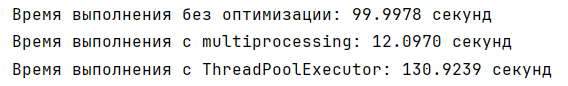

### 2.4.1. Пример №3 (Дополнительный)

Вспомним оптимизацию вычислений используя cupu:

In [ ]:
import time
import numpy as np

# Попытка импортировать cupy
try:
    import cupy as cp
    use_cuda = cp.is_available()
except ImportError:
    use_cuda = False

# use_cuda = False

def process_on_cpu(data):
    # Умножение матриц на CPU с использованием numpy
    return np.dot(data, data)

def process_on_gpu(data):
    # Умножение матриц на GPU с использованием cupy
    data_gpu = cp.asarray(data)
    result_gpu = cp.dot(data_gpu, data_gpu)
    return cp.asnumpy(result_gpu)

# Функция для замера времени выполнения
def measure_time(func, data):
    start_time = time.time()
    result = func(data)
    end_time = time.time()
    print(f"Время выполнения {func.__name__}: {end_time - start_time} секунд")
    # return result

# Данные для обработки
data = np.random.rand(1000, 1000)

# Выбор функции обработки в зависимости от доступности CUDA
if use_cuda:
    print("CUDA доступна. Используем GPU для обработки.")
    process_data = process_on_gpu
else:
    print("CUDA не доступна. Используем CPU для обработки.")
    process_data = process_on_cpu

# Замер скорости выполнения
measure_time(process_data, data)

CUDA доступна. Используем GPU для обработки.
Время выполнения process_on_gpu: 0.40411829948425293 секунд


# Практическая часть

Реализуем эффективное программное решение прямой геодезической задачи

- Входные данные:
  - csv-файл с параметрами (Xa, Ya, d, alpha)

- Выходные данные (опционально):
  - csv-файл с вычесленными параметрами (dX, dY, Xb, Yb)
  - xlsx-файл с вычесленными параметрами (dX, dY, Xb, Yb)
  - DataFrame с вычесленными параметрами (dX, dY, Xb, Yb)


## 1. Генератор синтетического набора входных данных

In [8]:
import random
import csv
import numpy as np
from openpyxl import Workbook

def generate_data(filename, num_files=1, num_records_range=(100, 200),
                  Xa_range=(1100, 10000), Ya_range=(1100, 10000),
                  d_range=(1, 1500), alpha_range=(1, 360), save_xlsx=False):

    for i in range(num_files):
        num_records = random.randint(*num_records_range)

        # Создание массивов NumPy
        Xa = np.random.uniform(*Xa_range, size=num_records)
        Ya = np.random.uniform(*Ya_range, size=num_records)
        d = np.random.uniform(*d_range, size=num_records)
        alpha = np.random.uniform(*alpha_range, size=num_records)

        data = np.column_stack((Xa, Ya, d, alpha))

        file_extension = ".csv" # По умолчанию сохраняем в формате CSV
        if save_xlsx:
            file_extension = ".xlsx" # Если указано сохранение в XLSX

        if i > 0:
            full_filename = f"{filename}_{i}{file_extension}" # Добавляем индекс к имени файла
        else:
            full_filename = f"{filename}{file_extension}"

        if save_xlsx:
            wb = Workbook()
            ws = wb.active
            ws.append(["Xa", "Ya", "d", "alpha"])
            ws.append(data)
            wb.save(full_filename)
        else:
            with open(full_filename, 'w', newline='') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerow(["Xa", "Ya", "d", "alpha"])
                writer.writerows(data)

        print(f"Данные сгенерированы и сохранены в {full_filename}")

In [9]:
# generate_data("big_data", num_files=1, num_records_range=(10000000, 15000000))
generate_data("my_data", num_files=5, num_records_range=(10000, 15000))

Данные сгенерированы и сохранены в my_data.csv
Данные сгенерированы и сохранены в my_data_1.csv
Данные сгенерированы и сохранены в my_data_2.csv
Данные сгенерированы и сохранены в my_data_3.csv
Данные сгенерированы и сохранены в my_data_4.csv


## 2. Функция-генератор для последовательного считывания входных данных

In [6]:
import os
import pandas as pd

def process_csv(path, chunk_size=1000):
    """
    Обрабатывает все CSV файлы в папке или один CSV файл и возвращает ограниченный набор данных.

    Args:
        path (str): Путь к папке с CSV файлами или к одному CSV файлу.
        chunk_size (int, optional): Количество возвращаемых строк. По умолчанию 1000.

    Yields:
        pd.DataFrame: Часть данных из каждого CSV файла.
    """
    if os.path.isdir(path):
        # Обрабатываем все CSV файлы в папке
        for filename in os.listdir(path):
            if filename.lower().endswith(".csv"):
                file_path = os.path.join(path, filename)
                first_row = pd.read_csv(file_path, nrows=1, header=None)
                if first_row.applymap(lambda x: isinstance(x, (int, float))).all().all():
                    header_value = None
                else:
                    header_value = 0
                for chunk in pd.read_csv(file_path, chunksize=chunk_size, header=header_value):
                    yield chunk.reset_index(drop=True)
    elif os.path.isfile(path) and path.lower().endswith(".csv"):
        # Обрабатываем один CSV файл
        first_row = pd.read_csv(path, nrows=1, header=None)
        if first_row.applymap(lambda x: isinstance(x, (int, float))).all().all():
            header_value = None
        else:
            header_value = 0
        for chunk in pd.read_csv(path, chunksize=chunk_size, header=header_value):
            yield chunk.reset_index(drop=True)
    else:
        raise ValueError("Недопустимый путь к файлу или папке.")

In [10]:
# Пример использования
path = "/content/my_data_1.csv"
csv_gen = process_csv(path, 100)
# for data_chunk in csv_gen:
#     print(data_chunk.head())
next(csv_gen)

<ipython-input-6-f78c5b0d597c>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if first_row.applymap(lambda x: isinstance(x, (int, float))).all().all():


,Xa,Ya,d,alpha
0,7577.262215,1658.011229,207.723741,264.210136
1,6701.579847,3315.197916,1458.779302,247.501977
2,8222.086460,7026.141364,714.336116,117.280412
3,4670.877733,4191.862425,370.429043,134.376607
4,2045.784275,9722.000666,1276.374293,221.708615
...,...,...,...,...
95,6159.679438,1744.274021,55.682799,119.806611
96,9715.584623,2649.679276,984.182688,151.552182
97,4889.524108,3835.817306,885.767429,221.722387
98,8010.205662,9105.632795,686.607445,320.668200


## 3. Реализация функции для решения прямой геодезической задачи

### 2.1. Базовая реализация

In [5]:
import math
import pandas as pd

def direct_task(df):
    # Инициализируем списки для хранения результатов
    dX = []
    dY = []
    Xb = []
    Yb = []

    # Итерируем по каждой строке в датафрейме
    for index, row in df.iterrows():
        # Извлекаем значения из строки
        Xa = float(row['Xa'])
        Ya = float(row['Ya'])
        d = float(row['d'])
        alpha = float(row['alpha'])

        # Вычисляем dX и dY с помощью math
        dX.append(d * math.cos(math.radians(alpha)))
        dY.append(d * math.sin(math.radians(alpha)))

        # Вычисляем Xb и Yb
        Xb.append(Xa + dX[-1])
        Yb.append(Ya + dY[-1])

    # Создаем новый датафрейм с результатами
    result_df = pd.DataFrame({
        'dX': dX,
        'dY': dY,
        'Xb': Xb,
        'Yb': Yb
    })

    return result_df

In [ ]:
sample_df = pd.DataFrame({
    'Xa': [25.0, 2.0, 3.0],
    'Ya': [140.0, 5.0, 6.0],
    'd': [124.0, 8.0, 9.0],
    'alpha': [46.97, 60.0, 30.0]
})

result = direct_task(sample_df)
print(result)

          dX         dY          Xb          Yb
0  84.615269  90.643567  109.615269  230.643567
1   4.000000   6.928203    6.000000   11.928203
2   7.794229   4.500000   10.794229   10.500000


### 2.2. Оптимальная реализация с векторизацией вычислений

In [3]:
import numpy as np
import pandas as pd

def direct_task(df):
    try:
        # Извлекаем значения из колонок датафрейма
        Xa = df['Xa'].astype(float)
        Ya = df['Ya'].astype(float)
        d = df['d'].astype(float)
        alpha = df['alpha'].astype(float)

        # Вычисляем dX и dY с помощью NumPy
        dX = d * np.cos(np.radians(alpha))
        dY = d * np.sin(np.radians(alpha))

        # Вычисляем Xb и Yb
        Xb = Xa + dX
        Yb = Ya + dY

        # Создаем новый датафрейм с результатами
        result_df = pd.DataFrame({
            'dX': dX,
            'dY': dY,
            'Xb': Xb,
            'Yb': Yb
        })

        return result_df

    except:
        return None


In [4]:
sample_df = pd.DataFrame({
    'Xa': [25.0, 2.0, 3.0],
    'Ya': [140.0, 5.0, 6.0],
    'd': [124.0, 8.0, 9.0],
    'alpha': [46.97, 60.0, 30.0]
})

result = direct_task(sample_df)
print(result)

          dX         dY          Xb          Yb
0  84.615269  90.643567  109.615269  230.643567
1   4.000000   6.928203    6.000000   11.928203
2   7.794229   4.500000   10.794229   10.500000


### 2.3. Оптимальная реализация с векторизацией вычислений и их выполнением на GPU

In [1]:
import pandas as pd
import cupy as cp

def direct_task(df):
    try:
        # Извлекаем значения из колонок датафрейма
        Xa = cp.asarray(df['Xa'].astype(float))
        Ya = cp.asarray(df['Ya'].astype(float))
        d = cp.asarray(df['d'].astype(float))
        alpha = cp.asarray(df['alpha'].astype(float))

        # Вычисляем dX и dY с помощью CuPy
        dX = d * cp.cos(cp.radians(alpha))
        dY = d * cp.sin(cp.radians(alpha))

        # Вычисляем Xb и Yb
        Xb = Xa + dX
        Yb = Ya + dY

        # Создаем новый датафрейм с результатами
        result_df = pd.DataFrame({
            'dX': cp.asnumpy(dX),
            'dY': cp.asnumpy(dY),
            'Xb': cp.asnumpy(Xb),
            'Yb': cp.asnumpy(Yb)
        })

        return result_df

    except:
        return None

In [2]:
sample_df = pd.DataFrame({
    'Xa': [25.0, 2.0, 3.0],
    'Ya': [140.0, 5.0, 6.0],
    'd': [124.0, 8.0, 9.0],
    'alpha': [46.97, 60.0, 30.0]
})

result = direct_task(sample_df)
print(result)

          dX         dY          Xb          Yb
0  84.615269  90.643567  109.615269  230.643567
1   4.000000   6.928203    6.000000   11.928203
2   7.794229   4.500000   10.794229   10.500000


## 4. Многопоточная и многопроцессорная оптимизация. Сравнение и выбор оптимального варианта

In [12]:
import multiprocessing
from concurrent.futures import ThreadPoolExecutor
import pandas as pd
import numpy as np
import time

def parallel_processing(df, num_processes=multiprocessing.cpu_count(), use_multiprocessing=False, proc_fun = direct_task):
    """
    Разделяет датафрейм на фрагменты и обрабатывает их параллельно с помощью ThreadPoolExecutor или multiprocessing.

    Args:
        df (pandas.DataFrame): Исходный датафрейм.
        num_processes (int, optional): Количество процессов/потоков для использования. По умолчанию используется количество ядер CPU.
        use_multiprocessing (bool, optional): True - использовать multiprocessing, False - ThreadPoolExecutor.

    Returns:
        pandas.DataFrame: Объединенный результат обработки фрагментов.
    """

    # Разделяем датафрейм на фрагменты
    df_split = np.array_split(df, num_processes)

    if use_multiprocessing:
        # Multiprocessing
        with multiprocessing.Pool(processes=num_processes) as pool:
            result_list = pool.map(proc_fun, df_split)
    else:
        # ThreadPoolExecutor
        with ThreadPoolExecutor(max_workers=num_processes) as pool:
            result_list = pool.map(proc_fun, df_split)

    # Объединяем результаты
    final_df = pd.concat([result for result in result_list if result is not None])

    return final_df


# Пример использования
if __name__ == "__main__":
    # Ваш датафрейм (замените на свой)
    df = pd.read_csv("/content/my_data.csv")

    # Выполнение без multiprocessing
    start_time = time.time()
    result_df_direct = direct_task(df)
    end_time = time.time()
    direct_time = end_time - start_time
    print(f"Время выполнения без multiprocessing: {direct_time:.4f} секунд")

    # Выполнение с multiprocessing
    start_time = time.time()
    result_df_multiprocessing = parallel_processing(df.copy(), use_multiprocessing=True)
    end_time = time.time()
    parallel_time = end_time - start_time
    print(f"Время выполнения с multiprocessing: {parallel_time:.4f} секунд")

    # Выполнение с ThreadPoolExecutor
    start_time = time.time()
    result_df_threadpoolexecutor = parallel_processing(df.copy(), use_multiprocessing=False)
    end_time = time.time()
    threadpoolexecutor_time = end_time - start_time
    print(f"Время выполнения с ThreadPoolExecutor: {threadpoolexecutor_time:.4f} секунд")

Время выполнения без multiprocessing: 0.0022 секунд


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Время выполнения с multiprocessing: 0.0733 секунд
Время выполнения с ThreadPoolExecutor: 0.0069 секунд


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


## 5. Функция для последовательного экспорта выходных данных

In [13]:
import pandas as pd

def process_and_save_with_function(generator, processing_function=None, output_file='output.csv', save_xlsx=False):
    """
    Обрабатывает данные из генератора с помощью указанной функции и сохраняет результаты в CSV или XLSX файл.

    Args:
        generator: Генератор, возвращающий pd.DataFrame.
        output_file (str): Имя файла для сохранения результатов.
        save_xlsx (bool, optional): Сохранять в формате XLSX (True) или CSV (False). По умолчанию False.
        processing_function (function, optional): Функция для обработки данных из генератора. Должна принимать pd.DataFrame и возвращать pd.DataFrame.
    """
    header_value = None
    first_chunk = next(generator, None)
    if first_chunk is not None:
        if processing_function:
            first_chunk = processing_function(first_chunk)
        if save_xlsx:
            header_value = 0
            wb = pd.ExcelWriter(output_file, engine='openpyxl')
            first_chunk.to_excel(wb, sheet_name='Sheet1', index=False, header=header_value)
        else:
            # Если нет заголовков, заполняем первую строку цифрами
            if first_chunk.columns.empty:
                first_chunk.columns = range(1, len(first_chunk.columns) + 1)
            first_chunk.to_csv(output_file, index=False, header=True)
        for chunk in generator:
            if processing_function:
                chunk = processing_function(chunk)
            if save_xlsx:
                chunk.to_excel(wb, sheet_name='Sheet1', index=False, header=header_value)
            else:
                chunk.to_csv(output_file, mode='a', index=False, header=False)  # Добавляем данные без заголовков
        if save_xlsx:
            wb.save()
        # print(f"Результаты сохранены в файл {output_file}")
    else:
        print("Нет данных для обработки.")

In [15]:
def measure_time(func, args):
    start = time.time()
    func(*args)
    end = time.time()
    return end - start

# Запуск функции с разными методами и измерение времени

path = "/content/my_data.csv"

generator = process_csv(path, 1000000)
processing_function = direct_task
sequential_time = measure_time(process_and_save_with_function, args=(generator, processing_function))

print(f"Время  выполнения: {sequential_time:.10f} секунд")

Время  выполнения: 0.1266787052 секунд


<ipython-input-6-f78c5b0d597c>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if first_row.applymap(lambda x: isinstance(x, (int, float))).all().all():


## Выполним те же действия без использования генераторов:

In [16]:
start_time = time.time()
sample_df = pd.read_csv("/content/my_data.csv")

result = direct_task(sample_df)
result.to_csv("output_file.csv", index=False, header=True)
end_time = time.time()
print(f"Время выполнения: {end_time - start_time} секунд")

# result.head(15)

Время выполнения: 0.1071009635925293 секунд


In [17]:
del sample_df
del result

# Комплексное задание №1.

### Ссылка на алгоритм вычисления и пример : https://clck.ru/39aKXC

## **Ход выполнения работы:**

### 1. Напишите функцию для формирования синтетического набора входных данных

Требования к входным данным:

- excel-таблицы или csv-файлы (опционально)
- первая строка содержит заголовки столбцов
- данные в столбцах - значения B (широты) и L (долготы)

Пример:

| B | L |
|---|---|
| 56.4532 | 37.5432 |
| 45.6789 | 12.3456 |
| -34.5678 | 98.7654 |
| 78.9012 | -56.7890 |
| 23.4567 | 89.0123 |
| -12.3456 | 45.6789 |
| 67.8901 | -23.4567 |
| 34.5678 | 78.9012 |
| -98.7654 | 34.5678 |
| 12.3456 | -98.7654 |

**Примечание:**

* Эта таблица содержит 10 случайных значений широты и долготы
* Широта может быть от -90° до 90°
* Долгота может быть от -180° до 180°

In [19]:
import random
import csv
import numpy as np
from openpyxl import Workbook

def generate_synthetic_data(file_name: str, num_rows: int = 100, file_type: str = "csv"):
    """
    Генерирует синтетический набор данных с координатами широты (B) и долготы (L).

    :param file_name: Имя файла для сохранения (без расширения)
    :param num_rows: Количество строк данных (по умолчанию 100)
    :param file_type: Тип файла ("csv" или "xlsx")
    """
    headers = ["B", "L"]

    data = [(round(random.uniform(-90, 90), 6), round(random.uniform(-180, 180), 6)) for _ in range(num_rows)]

    if file_type == "csv":
        with open(f"{file_name}.csv", mode="w", newline="", encoding="utf-8") as file:
            writer = csv.writer(file)
            writer.writerow(headers)
            writer.writerows(data)
    elif file_type == "xlsx":
        wb = Workbook()
        ws = wb.active
        ws.append(headers)
        for row in data:
            ws.append(row)
        wb.save(f"{file_name}.xlsx")
    else:
        raise ValueError("Некорректный формат файла. Используйте 'csv' или 'xlsx'.")

generate_synthetic_data("synthetic_data", num_rows=200, file_type="xlsx")


### 2. Напишите функцию-генератор для последовательного считывания данных из входного файла (csv-файл, excel-таблица)

- Функция принимает на вход путь к файлу и количество строк, которые необходимо возвращать каждую итерацию. Сама функция последовательно возвращает указанное Вами количество строк, до тех пор, пока они не закончатся в этом файле

- Возвращает DataFrame, с указанным количеством строк

In [35]:
import pandas as pd

def read_file_in_chunks(file_path: str, chunk_size: int):
    """
    Последовательно считывает данные из CSV или Excel файла частями.

    Args:
        file_path (str): Путь к файлу.
        chunk_size (int): Количество строк в каждой части.

    Yields:
        pd.DataFrame: Часть данных указанного размера.

    Raises:
        ValueError: Если формат файла не поддерживается.
    """
    if file_path.endswith('.csv'):
        # Для CSV используем встроенный chunksize
        reader = pd.read_csv(file_path, chunksize=chunk_size)
        for chunk in reader:
            yield chunk
    elif file_path.endswith(('.xlsx', '.xls')):
        # Для Excel считываем весь файл и разбиваем на части
        df = pd.read_excel(file_path)
        for i in range(0, len(df), chunk_size):
            yield df[i:i+chunk_size]
    else:
        raise ValueError("Поддерживаются только форматы CSV и Excel (.xlsx, .xls)")

# Чтение CSV файла частями по 100 строк
for chunk in read_file_in_chunks('/content/synthetic_data.xlsx', 10):
    print(f"Прочитано {chunk} строк")

Прочитано            B           L
0  -0.978970 -130.815659
1  86.054372   -7.252903
2  41.908222   10.479744
3 -87.647420  105.149755
4 -64.202911  -51.404482
5  34.957264 -132.504814
6  13.252241 -163.140502
7 -81.922738  154.509820
8  85.049713  159.958195
9 -63.186652  165.094725 строк
Прочитано             B           L
10  37.636811  174.576168
11  63.870360  -50.691080
12 -47.562640  165.436731
13 -56.603433  -77.060774
14  -8.040183  130.833928
15  35.280290  -36.893922
16  33.204168   79.380645
17  55.643138   69.465731
18  51.380839   70.713385
19 -82.037293 -166.073370 строк
Прочитано             B           L
20 -68.441152   31.801257
21 -39.304816 -172.593645
22 -72.024699   -0.224734
23 -39.956982  -83.135245
24  38.509652  -64.310300
25  17.645628  134.174082
26   2.843917  171.193363
27 -64.767195  -72.255613
28 -30.361690   88.459876
29 -17.322830   39.697561 строк
Прочитано             B           L
30   4.123564  -60.900696
31 -30.962866   18.545103
32 -75.464983  15

### 3. Напишите оптимальную функцию для реализации алгоритма

- Принимает на вход DataFrame с входными данными
- Возвращает DataFrame с выходными данными (вычесленными параметрами)
- Вычисления должны быть реализованы средствами numpy
- Добавить опционально возможность вычисления на CUDA GPU

In [45]:
import pandas as pd
import numpy as np

def compute_parameters(df, use_gpu=False):
    """
    Вычисляет статистические параметры для числовых колонок DataFrame с использованием CPU или GPU.

    Args:
        df (pd.DataFrame): Входные данные.
        use_gpu (bool): Использовать ли CUDA GPU (по умолчанию False).

    Returns:
        pd.DataFrame: Статистические параметры (среднее, стандартное отклонение, сумма).
    """
    # Фильтрация числовых колонок
    numeric_df = df.select_dtypes(include=[np.number])
    if numeric_df.empty:
        raise ValueError("В DataFrame нет числовых колонок для обработки.")

    # Выбор бэкенда (CPU/GPU)
    if use_gpu:
        try:
            import cupy as cp
            if not cp.cuda.is_available():
                raise RuntimeError("CUDA недоступен")
            xp = cp
            data = cp.asarray(numeric_df.values)
        except ImportError:
            print("CuPy не установлен. Установка...")
            !pip install cupy-cuda11x  # Для Colab с CUDA 11.x
            import cupy as cp
            if not cp.cuda.is_available():
                raise RuntimeError("CUDA недоступен после установки")
            xp = cp
            data = cp.asarray(numeric_df.values)
        except Exception as e:
            print(f"GPU error: {e}. Переключение на CPU.")
            use_gpu = False
            xp = np
            data = numeric_df.values
    else:
        xp = np
        data = numeric_df.values

    # Вычисления
    mean = xp.mean(data, axis=0)
    std = xp.std(data, axis=0)
    total = xp.sum(data, axis=0)

    # Перенос данных с GPU на CPU при необходимости
    if use_gpu:
        mean = mean.get()
        std = std.get()
        total = total.get()

    # Формирование результата
    result = np.vstack([mean, std, total])
    result_df = pd.DataFrame(
        result,
        index=['Mean', 'Std', 'Sum'],
        columns=numeric_df.columns
    )

    return result_df

df = pd.DataFrame({
    'A': np.random.rand(10000000),
    'B': np.random.randint(0, 10000000, 10000000),
    'C': ['text'] * 10000000
})

Результаты на CPU:
                 A             B
Mean  4.999499e-01  4.999159e+06
Std   2.887434e-01  2.887058e+06
Sum   4.999499e+06  4.999159e+13

Результаты на GPU:
                 A             B
Mean  4.999499e-01  4.999159e+06
Std   2.887434e-01  2.887058e+06
Sum   4.999499e+06  4.999159e+13


In [46]:
result_cpu = compute_parameters(df)
print("Результаты на CPU:")
print(result_cpu)

Результаты на CPU:
                 A             B
Mean  4.999499e-01  4.999159e+06
Std   2.887434e-01  2.887058e+06
Sum   4.999499e+06  4.999159e+13


In [47]:
try:
    result_gpu = compute_parameters(df, use_gpu=True)
    print("\nРезультаты на GPU:")
    print(result_gpu)
except Exception as e:
    print(f"\nОшибка GPU: {e}")


Результаты на GPU:
                 A             B
Mean  4.999499e-01  4.999159e+06
Std   2.887434e-01  2.887058e+06
Sum   4.999499e+06  4.999159e+13


### 4. Оптимизируйте вычисления, используя Multiprocessing, ThreadPoolExecutor и CuPy

- Сравните их по скорости. Выведите время выполнения с их использованием и без их использования
- Выберите оптимальный вариант оптимизации на CPU

In [2]:
import pandas as pd
import numpy as np
import time
from multiprocessing import get_context
from concurrent.futures import ThreadPoolExecutor

def compute_parameters(df, method='base', use_gpu=False):
    """
    Вычисляет статистические параметры с поддержкой различных методов оптимизации.

    Args:
        df (pd.DataFrame): Входные данные.
        method (str): Метод оптимизации ('base', 'multiprocessing', 'threading').
        use_gpu (bool): Использовать ли GPU (CuPy).

    Returns:
        tuple: (результат pd.DataFrame, время выполнения).
    """
    numeric_df = df.select_dtypes(include=[np.number])
    if numeric_df.empty:
        raise ValueError("Нет числовых колонок")

    data = numeric_df.values
    start_time = time.time()

    if use_gpu:
        try:
            import cupy as cp
            if not cp.cuda.is_available():
                raise RuntimeError("CUDA недоступен")
            data_gpu = cp.asarray(data)
            mean = cp.mean(data_gpu, axis=0).get()
            std = cp.std(data_gpu, axis=0).get()
            total = cp.sum(data_gpu, axis=0).get()
        except Exception as e:
            print(f"GPU error: {e}. Переключение на CPU.")
            use_gpu = False

    if not use_gpu:
        if method == 'base':
            mean = np.mean(data, axis=0)
            std = np.std(data, axis=0)
            total = np.sum(data, axis=0)
        elif method == 'multiprocessing':
            with get_context('spawn').Pool() as pool:
                mean_async = pool.apply_async(np.mean, (data,), {'axis': 0})
                std_async = pool.apply_async(np.std, (data,), {'axis': 0})
                total_async = pool.apply_async(np.sum, (data,), {'axis': 0})
                mean = mean_async.get()
                std = std_async.get()
                total = total_async.get()
        elif method == 'threading':
            with ThreadPoolExecutor() as executor:
                futures = [
                    executor.submit(np.mean, data, axis=0),
                    executor.submit(np.std, data, axis=0),
                    executor.submit(np.sum, data, axis=0)
                ]
                mean, std, total = [f.result() for f in futures]
        else:
            raise ValueError("Неизвестный метод")

    elapsed_time = time.time() - start_time

    result = np.vstack([mean, std, total])
    result_df = pd.DataFrame(
        result,
        index=['Mean', 'Std', 'Sum'],
        columns=numeric_df.columns
    )

    return result_df, elapsed_time

def benchmark_methods(df, methods=None, use_gpu=False):
    """
    Сравнивает скорость выполнения для различных методов.

    Args:
        df (pd.DataFrame): Тестовые данные.
        methods (list): Список методов для тестирования.
        use_gpu (bool): Тестировать ли GPU.
    """
    if methods is None:
        methods = ['base', 'multiprocessing', 'threading']

    results = {}

    # Тестирование CPU методов
    for method in methods:
        try:
            _, elapsed = compute_parameters(df, method=method, use_gpu=False)
            results[f"CPU ({method})"] = elapsed
        except Exception as e:
            results[f"CPU ({method})"] = f"Ошибка: {str(e)}"

    # Тестирование GPU
    if use_gpu:
        try:
            _, elapsed = compute_parameters(df, use_gpu=True)
            results["GPU (CuPy)"] = elapsed
        except Exception as e:
            results["GPU (CuPy)"] = f"Ошибка: {str(e)}"

    # Вывод результатов
    max_name_len = max(len(k) for k in results.keys())
    print(f"{'Метод':<{max_name_len}} | Время (с)")
    print("-" * (max_name_len + 12))
    for method, time_taken in results.items():
        print(f"{method:<{max_name_len}} | {time_taken:.4f} с" if isinstance(time_taken, float) else f"{method:<{max_name_len}} | {time_taken}")

# Пример использования в Colab
if __name__ == "__main__":
    # Генерация тестовых данных
    df_small = pd.DataFrame(np.random.rand(1000, 10))
    df_medium = pd.DataFrame(np.random.rand(10000, 100))
    df_large = pd.DataFrame(np.random.rand(10000, 10000))

    print("Тестирование на малых данных (1000 строк, 10 колонок):")
    benchmark_methods(df_small, use_gpu=True)

    print("\nТестирование на средних данных (10000 строк, 100 колонок):")
    benchmark_methods(df_medium, use_gpu=True)

    print("\nТестирование на больших данных (100000 строк, 1000 колонок):")
    benchmark_methods(df_large, use_gpu=True)

Тестирование на малых данных (1000 строк, 10 колонок):
Метод                 | Время (с)
---------------------------------
CPU (base)            | 0.0006 с
CPU (multiprocessing) | 0.2431 с
CPU (threading)       | 0.0010 с
GPU (CuPy)            | 0.0022 с

Тестирование на средних данных (10000 строк, 100 колонок):
Метод                 | Время (с)
---------------------------------
CPU (base)            | 0.0053 с
CPU (multiprocessing) | 0.2927 с
CPU (threading)       | 0.0075 с
GPU (CuPy)            | 0.0073 с

Тестирование на больших данных (100000 строк, 1000 колонок):
Метод                 | Время (с)
---------------------------------
CPU (base)            | 0.6101 с
CPU (multiprocessing) | 9.8528 с
CPU (threading)       | 0.6658 с
GPU (CuPy)            | 0.2443 с


### 5. Напишите функцию для для последовательного экспорта выходных данных в книгу Excel

- На каждую пару входных данных (строку таблицы входных данных) в книге должен формироваться отдельный лист с расчетами по [образцу](https://clck.ru/39aKXC)

In [3]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install xlsxwriter
# !apt-get -qq install -y libfluidsynth1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 11.9 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np

# Исходные данные
ellipsoids = {
    'Красовского': {'a': 6378245, 'alpha': 0.00335233},
    'WGS-84': {'a': 6378137, 'alpha': 0.003352891},
    'ПЗ-90': {'a': 6378136, 'alpha': 0.003352804}
}

n = 20  # Номер варианта
B_deg = 55 + 10 * n / 60  # Широта в градусах
L_deg = 37.5  # Долгота в градусах

def calculate_ellipsoid_params(a, alpha):
    # Основные параметры
    b = a * (1 - alpha)
    e_sq = alpha * (2 - alpha)
    e1_sq = e_sq / (1 - e_sq)
    c = a**2 / b

    # Контрольные формулы
    control_b = a**2 / c
    control_e_sq = (a**2 - b**2) / a**2
    control_e1_sq = (a**2 - b**2) / b**2
    control_alpha = (a - b) / a

    return {
        'b': b,
        'e²': e_sq,            # Исправлено на требуемое название
        '(e¹)²': e1_sq,        # Исправлено на требуемое название
        'c': c,
        'control_b': control_b,
        'control_e²': control_e_sq,
        'control_(e¹)²': control_e1_sq,
        'control_α': control_alpha
    }

def calculate_spheroid_functions(B_rad, e_sq, e1_sq):
    sin_B = np.sin(B_rad)
    cos_B = np.cos(B_rad)

    W_sq = 1 - e_sq * sin_B**2
    V_sq = 1 + e1_sq * cos_B**2

    return {
        'W²': W_sq,            # Исправлено на требуемое название
        'V²': V_sq,            # Исправлено на требуемое название
        'sin_B': sin_B,
        'cos_B': cos_B
    }

def calculate_curvature_radii(c, V, W):
    M = c / V**1.5
    N = c / V
    R_avg = np.sqrt(M * N)

    return {
        'M': M,
        'N': N,
        'Rср.': R_avg
    }

def calculate_cartesian_coords(a, b, B_rad, L_rad, e_sq, sin_B, cos_B):
    U_rad = np.arctan(np.sqrt(1 - e_sq) * np.tan(B_rad))
    cos_U = np.cos(U_rad)
    sin_U = np.sin(U_rad)
    cos_L = np.cos(L_rad)
    sin_L = np.sin(L_rad)

    x_param = a * cos_U * cos_L
    y_param = a * cos_U * sin_L
    z_param = b * sin_U

    N = a / np.sqrt(1 - e_sq * sin_B**2)
    x_geo = N * cos_B * cos_L
    y_geo = N * cos_B * sin_L
    z_geo = N * (1 - e_sq) * sin_B

    return {
        'x_param': x_param,
        'y_param': y_param,
        'z_param': z_param,
        'x_geo': x_geo,
        'y_geo': y_geo,
        'z_geo': z_geo
    }

# Преобразование углов в радианы
B_rad = np.radians(B_deg)
L_rad = np.radians(L_deg)

results = []
for name, params in ellipsoids.items():
    a = params['a']
    alpha = params['alpha']

    # Основные параметры
    base = calculate_ellipsoid_params(a, alpha)
    e_sq = base['e²']
    e1_sq = base['(e¹)²']

    # Сфероидические функции
    sph_funcs = calculate_spheroid_functions(B_rad, e_sq, e1_sq)
    sin_B = sph_funcs['sin_B']
    cos_B = sph_funcs['cos_B']

    # Радиусы кривизны
    curvature = calculate_curvature_radii(
        base['c'],
        np.sqrt(sph_funcs['V²']),  # Исправлено
        np.sqrt(sph_funcs['W²'])   # Исправлено
    )

    # Декартовы координаты
    coords = calculate_cartesian_coords(
        a,
        base['b'],
        B_rad,
        L_rad,
        e_sq,
        sin_B,
        cos_B
    )

    # Контрольные проверки
    control_aW = a * np.sqrt(sph_funcs['W²'])
    control_bV = base['b'] * np.sqrt(sph_funcs['V²'])
    control_N_M = sph_funcs['V²']

    results.append({
        'Эллипсоид': name,
        **base,
        **sph_funcs,
        **curvature,
        **coords,
        'control_aW': control_aW,
        'control_bV': control_bV,
        'control_N/M': control_N_M  # Исправлено название
    })

# Формирование DataFrame
df = pd.DataFrame(results)
df = df.round(4)  # Округление до 10^-4 метра

# Экспорт в Excel с форматированием
with pd.ExcelWriter('output.xlsx', engine='xlsxwriter') as writer:
    workbook = writer.book
    worksheet = workbook.add_worksheet('Результаты')

    # Заголовки
    headers = [
        'Эллипсоид',
        'b', 'e²', '(e¹)²', 'c',
        'W²', 'V²',
        'M', 'N', 'Rср.',
        'x_param', 'y_param', 'z_param',
        'x_geo', 'y_geo', 'z_geo',
        'control_aW', 'control_bV', 'control_N/M'
    ]
    header_format = workbook.add_format({'bold': True, 'bg_color': '#D3D3D3'})
    for col_num, value in enumerate(headers):
        worksheet.write(0, col_num, value, header_format)

    # Данные
    row = 1
    for _, data in df.iterrows():
        for col_num, key in enumerate(headers):
            if key == 'Эллипсоид':
                worksheet.write(row, col_num, data[key])
            else:
                worksheet.write_number(row, col_num, data[key])
        row += 1

    # Автоподбор ширины столбцов
    worksheet.autofit()

In [19]:
import pandas as pd

def export_to_excel(input_df, output_path, sheet_prefix="Data_", max_sheet_name_length=31):
    """
    Экспортирует каждую строку DataFrame в отдельный лист Excel-книги.

    Args:
        input_df (pd.DataFrame): Входные данные.
        output_path (str): Путь для сохранения файла.
        sheet_prefix (str): Префикс для названий листов.
        max_sheet_name_length (int): Максимальная длина названия листа.
    """
    # Подготовка Excel-книги
    with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
        workbook = writer.book

        # Форматы ячеек
        header_format = workbook.add_format({
            'bold': True,
            'bg_color': '#D3D3D3',
            'border': 1,
            'align': 'center'
        })
        data_format = workbook.add_format({'border': 1})

        for idx, (_, row) in enumerate(input_df.iterrows()):
            # Создание уникального имени листа
            sheet_name = f"{sheet_prefix}{idx}"
            if len(sheet_name) > max_sheet_name_length:
                sheet_name = sheet_name[:max_sheet_name_length]

            # Подготовка данных для листа
            sheet_data = pd.DataFrame({
                'Параметр': row.index,
                'Значение': row.values
            })

            # Запись данных
            sheet_data.to_excel(
                writer,
                sheet_name=sheet_name,
                index=False,
                startrow=2  # Смещение для заголовка
            )

            # Форматирование листа
            worksheet = writer.sheets[sheet_name]

            # Заголовок листа
            worksheet.merge_range(
                'A1:B1',
                f'Анализ данных: {sheet_name}',
                workbook.add_format({
                    'bold': True,
                    'font_size': 14,
                    'align': 'center'
                })
            )

            # Форматирование заголовков таблицы
            for col_num, value in enumerate(sheet_data.columns):
                worksheet.write(2, col_num, value, header_format)

            # Форматирование данных таблицы
            for row_num in range(3, len(sheet_data)+3):
                for col_num in range(len(sheet_data.columns)):
                    worksheet.write(row_num, col_num, sheet_data.iat[row_num-3, col_num], data_format)

            # Автоподбор ширины столбцов
            worksheet.set_column('A:A', 25)
            worksheet.set_column('B:B', 15)

    print(f"Файл успешно сохранен: {output_path}")

# Тестовый DataFrame
df = pd.DataFrame({
    'Параметр1': [1.2, 3.4, 5.6],
    'Параметр2': [7.8, 9.0, 1.2],
    'Описание': ['A', 'B', 'C']  # Нечисловые данные сохраняются как есть
})

# Экспорт в Excel
export_to_excel(
    df,
    "/content/output.xlsx",
    sheet_prefix="Образец_",
    max_sheet_name_length=20
)

Файл успешно сохранен: /content/output.xlsx


In [22]:
# Тестовый DataFrame
df = pd.read_csv('/content/my_data.csv')


# Экспорт в Excel
export_to_excel(
    df,
    "/content/output.xlsx",
    sheet_prefix="Образец_",
    max_sheet_name_length=20
)

Файл успешно сохранен: /content/output.xlsx


### Выполните вычисления, сравните скорости на большом массиве входных данных

In [17]:
import pandas as pd
import numpy as np
import time
from multiprocessing import get_context, cpu_count
from concurrent.futures import ThreadPoolExecutor, as_completed

# Исправленная генерация эллипсоидов с гарантией числовых типов
np.random.seed(42)
n_ellipsoids = 10000
ellipsoids = {
    f'Эллипсоид_{i}': {
        'a': int(np.random.randint(6378000, 6379000)),  # Явное преобразование в int
        'alpha': float(np.round(np.random.uniform(0.00335, 0.0034), 8))  # Явное преобразование в float
    } for i in range(n_ellipsoids)
}

B_deg = 58.5
L_deg = 37.5
B_rad = np.radians(B_deg)
L_rad = np.radians(L_deg)

def calculate_params_base(params):
    """Базовая функция для одного эллипсоида с проверкой типов"""
    a, alpha = params
    try:
        # Проверка типов данных
        a = float(a)
        alpha = float(alpha)

        # Основные параметры
        b = a * (1 - alpha)
        e_sq = alpha * (2 - alpha)
        e1_sq = e_sq / (1 - e_sq) if (1 - e_sq) != 0 else 0
        c = a**2 / b if b != 0 else 0

        # Сфероидические функции
        sin_B = np.sin(B_rad)
        cos_B = np.cos(B_rad)
        W_sq = 1 - e_sq * sin_B**2
        V_sq = 1 + e1_sq * cos_B**2

        # Радиусы кривизны
        M = c / (V_sq)**1.5 if V_sq != 0 else 0
        N = c / V_sq if V_sq != 0 else 0
        R_avg = np.sqrt(M * N) if (M*N) >= 0 else 0

        # Декартовы координаты
        e_sq_safe = e_sq if e_sq <= 1 else 1  # Защита от sqrt отрицательных чисел
        U_rad = np.arctan(np.sqrt(1 - e_sq_safe) * np.tan(B_rad))
        cos_U = np.cos(U_rad)
        sin_U = np.sin(U_rad)

        x_param = a * cos_U * np.cos(L_rad)
        y_param = a * cos_U * np.sin(L_rad)
        z_param = b * sin_U

        return {
            'b': round(b, 4),
            'e²': round(e_sq, 10),
            '(e¹)²': round(e1_sq, 10),
            'c': round(c, 4),
            'W²': round(W_sq, 10),
            'V²': round(V_sq, 10),
            'M': round(M, 4),
            'N': round(N, 4),
            'Rср.': round(R_avg, 4),
            'x_param': round(x_param, 3),
            'y_param': round(y_param, 3),
            'z_param': round(z_param, 3)
        }
    except Exception as e:
        print(f"Ошибка в calculate_params_base: {e}")
        return None

def calculate_params_numpy(params_list):
    """Векторизованная версия с защитой от деления на ноль"""
    try:
        a_list = np.array([float(p[0]) for p in params_list])
        alpha_list = np.array([float(p[1]) for p in params_list])

        # Защита от деления на ноль
        with np.errstate(divide='ignore', invalid='ignore'):
            b = np.where(alpha_list != 1, a_list * (1 - alpha_list), 0)
            e_sq = alpha_list * (2 - alpha_list)
            e1_sq = np.where((1 - e_sq) != 0, e_sq / (1 - e_sq), 0)
            c = np.where(b != 0, a_list**2 / b, 0)

            sin_B = np.sin(B_rad)
            cos_B = np.cos(B_rad)
            W_sq = 1 - e_sq * sin_B**2
            V_sq = 1 + e1_sq * cos_B**2

            M = np.where(V_sq != 0, c / V_sq**1.5, 0)
            N = np.where(V_sq != 0, c / V_sq, 0)
            R_avg = np.sqrt(M * N)

            e_sq_safe = np.clip(e_sq, 0, 1)
            U_rad = np.arctan(np.sqrt(1 - e_sq_safe) * np.tan(B_rad))
            cos_U = np.cos(U_rad)
            sin_U = np.sin(U_rad)

            x_param = a_list * cos_U * np.cos(L_rad)
            y_param = a_list * cos_U * np.sin(L_rad)
            z_param = b * sin_U

        return [dict(zip(
            ['b', 'e²', '(e¹)²', 'c', 'W²', 'V²', 'M', 'N', 'Rср.',
             'x_param', 'y_param', 'z_param'],
            np.round(values, [4, 10, 10, 4, 10, 10, 4, 4, 4, 3, 3, 3])
        )) for values in zip(b, e_sq, e1_sq, c, W_sq, V_sq, M, N, R_avg, x_param, y_param, z_param)]
    except Exception as e:
        print(f"Ошибка в calculate_params_numpy: {e}")
        return []

def calculate_params_gpu(params_list):
    """Версия с использованием CuPy"""
    try:
        import cupy as cp

        a_list = cp.array([float(p[0]) for p in params_list])
        alpha_list = cp.array([float(p[1]) for p in params_list])

        with cp.errstate(divide='ignore', invalid='ignore'):
            b = cp.where(alpha_list != 1, a_list * (1 - alpha_list), 0)
            e_sq = alpha_list * (2 - alpha_list)
            e1_sq = cp.where((1 - e_sq) != 0, e_sq / (1 - e_sq), 0)
            c = cp.where(b != 0, a_list**2 / b, 0)

            sin_B = cp.sin(B_rad)
            cos_B = cp.cos(B_rad)
            W_sq = 1 - e_sq * sin_B**2
            V_sq = 1 + e1_sq * cos_B**2

            M = cp.where(V_sq != 0, c / V_sq**1.5, 0)
            N = cp.where(V_sq != 0, c / V_sq, 0)
            R_avg = cp.sqrt(M * N)

            e_sq_safe = cp.clip(e_sq, 0, 1)
            U_rad = cp.arctan(cp.sqrt(1 - e_sq_safe) * cp.tan(B_rad))
            cos_U = cp.cos(U_rad)
            sin_U = cp.sin(U_rad)

            x_param = a_list * cos_U * cp.cos(L_rad)
            y_param = a_list * cos_U * cp.sin(L_rad)
            z_param = b * sin_U

        results = cp.asnumpy([b, e_sq, e1_sq, c, W_sq, V_sq, M, N, R_avg, x_param, y_param, z_param])

        return [dict(zip(
            ['b', 'e²', '(e¹)²', 'c', 'W²', 'V²', 'M', 'N', 'Rср.',
             'x_param', 'y_param', 'z_param'],
            np.round(values, [4, 10, 10, 4, 10, 10, 4, 4, 4, 3, 3, 3])
        )) for values in zip(*results)]
    except Exception as e:
        print(f"GPU error: {e}")
        return calculate_params_numpy(params_list)

# Улучшенный метод тестирования
def test_performance():
    methods = {
        'Base': lambda: [calculate_params_base((ell['a'], ell['alpha'])) for ell in ellipsoids.values()],
        # 'Multiprocessing': lambda: list(get_context('spawn').Pool(cpu_count()).imap(
        #     calculate_params_base,
        #     [(ell['a'], ell['alpha']) for ell in ellipsoids.values()],
        #     chunksize=50  # Оптимальный размер чанка
        # )),
        'ThreadPool': lambda: list(ThreadPoolExecutor().map(
            calculate_params_base,
            [(ell['a'], ell['alpha']) for ell in ellipsoids.values()]
        )),
        'Vectorized (CPU)': lambda: calculate_params_numpy([(ell['a'], ell['alpha']) for ell in ellipsoids.values()]),
        'Vectorized (GPU)': lambda: calculate_params_gpu([(ell['a'], ell['alpha']) for ell in ellipsoids.values()])
    }

    results = {}
    for name, method in methods.items():
        try:
            start = time.time()
            result = method()
            results[name] = {
                'time': time.time() - start,
                'result': result[:10]  # Сохраняем первые 10 результатов для проверки
            }
        except Exception as e:
            results[name] = f"Error: {str(e)}"

    return results

# Запуск тестов
performance = test_performance()

# Вывод результатов
print(f"Результаты для {n_ellipsoids} эллипсоидов:")
for method, data in performance.items():
    if isinstance(data, dict):
        print(f"{method.ljust(20)} | {data['time']:.4f} с")
        # Проверка первых результатов
        if data['result']:
            print(f"Первый результат для {method}:")
            print(data['result'][0])
    else:
        print(f"{method.ljust(20)} | {data}")

Ошибка в calculate_params_numpy: 'list' object cannot be interpreted as an integer
GPU error: module 'cupy' has no attribute 'errstate'
Ошибка в calculate_params_numpy: 'list' object cannot be interpreted as an integer
Результаты для 10000 эллипсоидов:
Base                 | 0.4356 с
Первый результат для Base:
{'b': 6356481.3185, 'e²': 0.0067681691, '(e¹)²': 0.0068142893, 'c': 6399796.2212, 'W²': np.float64(0.9950795732), 'V²': np.float64(1.0018603334), 'M': np.float64(6381979.0285), 'N': np.float64(6387912.5744), 'Rср.': np.float64(6384945.1122), 'x_param': np.float64(2650417.626), 'y_param': np.float64(2033736.974), 'z_param': np.float64(5414756.99)}
ThreadPool           | 1.4702 с
Первый результат для ThreadPool:
{'b': 6356481.3185, 'e²': 0.0067681691, '(e¹)²': 0.0068142893, 'c': 6399796.2212, 'W²': np.float64(0.9950795732), 'V²': np.float64(1.0018603334), 'M': np.float64(6381979.0285), 'N': np.float64(6387912.5744), 'Rср.': np.float64(6384945.1122), 'x_param': np.float64(2650417.62


- Выведите первую строку таблицы **входных** данных


In [21]:
import pandas as pd

# Исходные данные из задания
ellipsoids = {
    'Эллипсоид': ['Красовского', 'WGS-84', 'ПЗ-90'],
    'a (м)': [6378245, 6378137, 6378136],
    'α': [0.00335233, 0.003352891, 0.003352804]
}

# Создаем DataFrame
df = pd.DataFrame(ellipsoids)

# Выводим первую строку
print("Первая строка входных данных:")
print(df.head(1).to_string(index=False))

Первая строка входных данных:
  Эллипсоид   a (м)        α
Красовского 6378245 0.003352


- Выведите содержимое первой страницы таблицы **выходных** данных

In [ ]:
# Ваш код